In [1]:
import os
import pandas as pd
import numpy_financial
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

original_cwd = os.getcwd()
os.chdir("../scripts")
from population import within_radius_mask
from file_management import tif_data
os.chdir(original_cwd)

In [2]:
abc = 'abcdefgh'
all_countries = [
    'AT', 'BE', 'BG', 'CZ', 'DE', 
    'DK', 'EE', 'EL', 'ES', 'FI', 
    'FR', 'HR', 'HU', 'IE', 'IT', 
    'LT', 'LU', 'LV', 'NL', 'PL',
    'PT', 'RO', 'SE', 'SI', 'SK'
]
countries = all_countries

# Input

In [3]:
params = {
    'capacity': 2, # MW
    'invest': 963000, # €/MW
    'cost_qfix': 11340, # €/MW/year
    'lifetime': 30, # years
    'wacc': 0.073,  
    'availability': 0.9
}

In [4]:
turbines = pd.DataFrame()
for c in countries:
    tmp = pd.read_csv(f"../build/turbines-{c}.csv", index_col=0)[
        ['lcoe_eur_per_mwh', 'disamenity_cost_eur_per_mwh', '1', '2', '3', '4']
    ]
    tmp.columns = ['engineering', 'disamenity', 1, 2, 3, 4]
    tmp['disamenity'] = tmp['disamenity']
    tmp[c] = 2
    turbines = turbines.append(tmp)
    
turbines.sum()

engineering    2.429726e+08
disamenity     8.380455e+06
1              9.186601e+08
2              3.561010e+09
3              6.792235e+09
4              1.002282e+10
AT             1.625540e+05
BE             4.604000e+04
BG             2.879340e+05
CZ             2.638600e+05
DE             5.939140e+05
DK             9.528000e+03
EE             1.054380e+05
EL             3.314960e+05
ES             1.647420e+06
FI             1.400964e+06
FR             1.894978e+06
HR             1.456780e+05
HU             2.853160e+05
IE             2.572140e+05
IT             8.463520e+05
LT             2.618140e+05
LU             1.784000e+03
LV             2.988160e+05
NL             1.228220e+05
PL             9.158980e+05
PT             3.681720e+05
RO             8.359020e+05
SE             1.703574e+06
SI             2.642200e+04
SK             1.178680e+05
dtype: float64

In [5]:
turbines['DE'].sum()/1000

593.914

In [6]:
DE_capacities = {
    '1-200m': 480,
    '2-1000m': 317,
    '3-200m': 480,
    '4-1000m': 317,
    '5-200m': 40
}   

In [7]:
targets = pd.read_csv(f"../data/EU_wind_capacities_2050.csv", index_col=0)['0'] / 1000 
targets

AT      9.635319
BE      7.313586
BG      2.768476
CY      0.512958
CZ      3.846454
DE    105.519338
DK      9.937161
EE      1.166831
EL      9.932954
ES     64.122135
FI      9.319734
FR     66.062757
HR      2.334318
HU      3.131698
IE      8.054294
IT     26.003972
LT      2.271274
LU      0.630298
LV      0.950137
MT      0.000000
NL     25.198052
PL     14.695300
PT     11.990232
RO     10.572279
SE     14.511699
SI      0.312270
SK      1.821950
Name: 0, dtype: float64

In [8]:
population = pd.read_csv(f"../data/eurostat - population.csv", index_col=4)
population = population[population['TIME_PERIOD']==2020]['OBS_VALUE']
population

geo
AD               77543
AL             2845955
AM             2959694
AT             8901064
AZ            10067108
BE            11522440
BG             6951482
BY             9408350
CH             8606033
CY              888005
CZ            10693939
DE            83166711
DK             5822763
EA18         339780701
EA19         342574791
EE             1328976
EL            10718565
ES            47332614
EU27_2020    447485231
FI             5525292
FR            67485531
GE             3716858
HR             4058165
HU             9769526
IE             4964440
IS              364134
IT            59641488
LI               38747
LT             2794090
LU              626108
LV             1907675
ME              621873
MK             2076255
MT              514564
NL            17407585
NO             5367580
PL            37958138
PT            10295909
RO            19328838
RS             6926705
SE            10327589
SI             2095861
SK             5457873
SM     

# Section 2

In [9]:
weights3 = within_radius_mask(3)

C:\Users\olive\AppData\Local\Temp/ipykernel_3288/2051023192.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(-4,4))
C:\Users\olive\AppData\Local\Temp/ipykernel_3288/2051023192.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(-4,4))


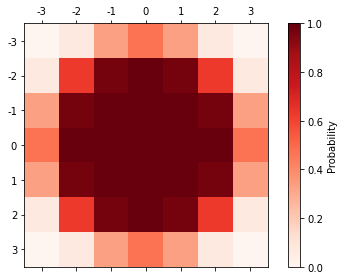

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

cmap=plt.get_cmap('Reds')
cax = ax.matshow(weights3.astype(float), cmap = cmap)

cbar = fig.colorbar(cax)
cbar.set_label('Probability')

ax.set_xticklabels(range(-4,4))
ax.set_yticklabels(range(-4,4))

plt.tight_layout()
plt.savefig('Figure 2.png', dpi=300)

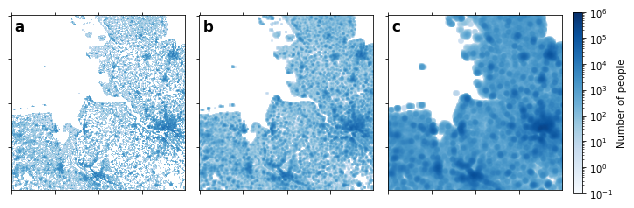

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(9,3), sharex='col', gridspec_kw={'width_ratios': [4,4,5]})

cmap=plt.get_cmap('Blues')

for i, file in enumerate(['data/population/JRC_1K_POP_2018', 'population-within-1km', 'population-within-3km']):
    cax = ax[i].matshow(
        tif_data(f'../build/{file}.tif', replace_nodata=0)[1900:2100, 3200:3400].astype(float), 
        cmap = cmap, norm=LogNorm(vmin=0.1, vmax=1_000_000)
    )
    ax[i].text(0.02, 0.98, abc[i], transform=ax[i].transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])

cbar = fig.colorbar(cax)
cbar.set_label('Number of people')

plt.tight_layout()
plt.savefig('Figure 3.png', dpi=300)

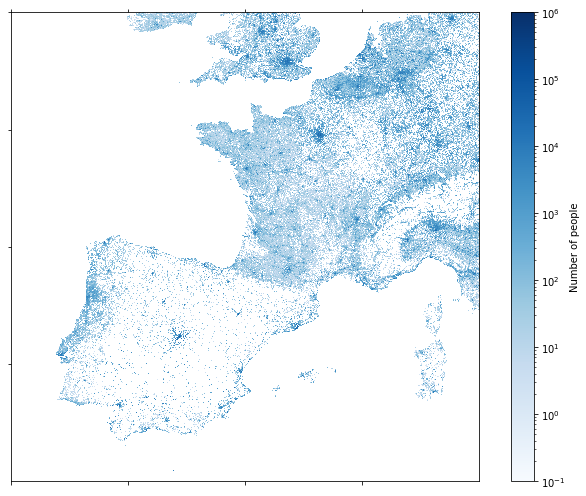

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(9,7)) #, sharex='col', gridspec_kw={'width_ratios': [4,4,5]})

cmap=plt.get_cmap('Blues')

for i, file in enumerate(['data/population/JRC_1K_POP_2018']):
    cax = ax.matshow(
        tif_data(f'../build/{file}.tif', replace_nodata=0)[2000:4000, 1500:3500].astype(float), 
        cmap = cmap, norm=LogNorm(vmin=0.1, vmax=1_000_000)
    )
    ax.set_xticklabels([])
    ax.set_yticklabels([])

cbar = fig.colorbar(cax)
cbar.set_label('Number of people')

plt.tight_layout()
plt.savefig('Figure FR vs. ES.png', dpi=300)

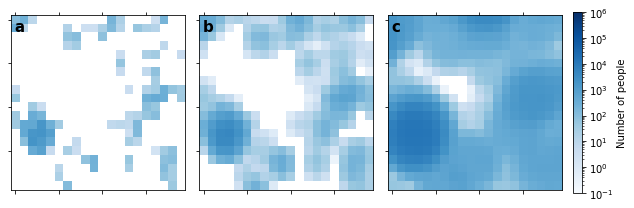

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(9,3), sharex='col', gridspec_kw={'width_ratios': [4,4,5]})

cmap=plt.get_cmap('Blues')

for i, file in enumerate(['data/population/JRC_1K_POP_2018', 'population-within-1km', 'population-within-3km']):
    cax = ax[i].matshow(
        tif_data(f'../build/{file}.tif', replace_nodata=0)[2080:2100, 3380:3400].astype(float), 
        cmap = cmap, norm=LogNorm(vmin=0.1, vmax=1_000_000)
    )
    ax[i].text(0.02, 0.98, abc[i], transform=ax[i].transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])

cbar = fig.colorbar(cax)
cbar.set_label('Number of people')

plt.tight_layout()

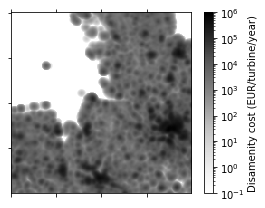

In [14]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
cmap=plt.get_cmap('Greys')
cax = ax.matshow(
    tif_data('../build/disamenity-cost.tif', replace_nodata=0)[1900:2100, 3200:3400].astype(float), 
    cmap = cmap, norm=LogNorm(vmin=0.1, vmax=1000000)
)
ax.set_xticklabels([])
ax.set_yticklabels([])

cbar = fig.colorbar(cax)
cbar.set_label('Disamenity cost (EUR/turbine/year)')

plt.tight_layout()
plt.savefig('Figure 4.png', dpi=300)

# Subsection 3.1

Cost potential curves

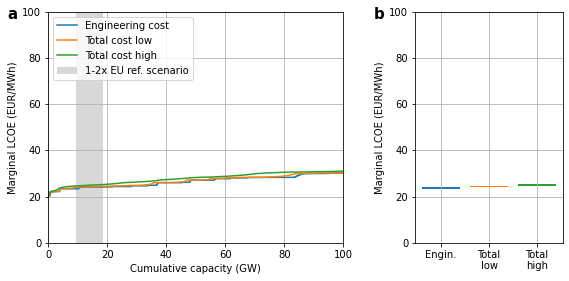

In [109]:
c = 'FI'

fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex='col', gridspec_kw={'width_ratios': [4,2]})

tmp = turbines[turbines[c]>0].copy()
cumulative_capacity = tmp[c].cumsum() / 1000
engineering_cost = tmp['engineering'].sort_values()
total_cost_low = (tmp['engineering'] + tmp['disamenity']).sort_values()
total_cost_high = (tmp['engineering'] + 10 * tmp['disamenity']).sort_values()

ax[0].text(-0.14, 1.02, 'a', transform=ax[0].transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

ax[0].plot(cumulative_capacity, engineering_cost, label='Engineering cost')
ax[0].plot(cumulative_capacity, total_cost_low, label='Total cost low')
ax[0].plot(cumulative_capacity, total_cost_high, label='Total cost high')

ax[0].fill_between([targets[c], 2*targets[c]], [0,0], [100,100], facecolor='grey', alpha=0.3, label='1-2x EU ref. scenario')

#ax[0].legend(loc='center right', bbox_to_anchor=(1.6,0.5))

ax[0].legend(loc='upper left')

ax[0].set_xlabel('Cumulative capacity (GW)')
ax[0].set_ylabel('Marginal LCOE (EUR/MWh)')
ax[0].set_xlim(0, 100)  # cumulative_capacity.iloc[-1])
ax[0].set_ylim(0, 100)
ax[0].grid()

ax[1].text(-0.28, 1.02, 'b', transform=ax[1].transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

for i, df in enumerate([engineering_cost, total_cost_low, total_cost_high]):
    ax[1].bar(
        i, 
        df.iloc[int(targets[c]/2*1000*2)]-df.iloc[int(targets[c]/2*1000)],
        bottom=df.iloc[int(targets[c]/2*1000)]
    )
#ax[1].text(1, 20, 'Lower end: 1x EU\nreference scenario', ha='center', va='center', bbox={'facecolor': 'white', 'edgecolor': 'grey'})
#ax[1].text(1, 55, 'Upper end: 2x EU\nreference scenario', ha='center', va='center', bbox={'facecolor': 'white', 'edgecolor': 'grey'})
ax[1].set_xticks([0, 1, 2])
ax[1].set_xticklabels(['Engin.','Total\nlow','Total\nhigh'])
ax[1].set_ylim(0, 100)
ax[1].set_ylabel('\nMarginal LCOE (EUR/MWh)')
ax[1].grid()

plt.tight_layout()
#plt.savefig('Figure 5.png', dpi=300)

In [16]:
tmp['disamenity'].mean() / tmp['engineering'].mean()

0.06648298098058411

In [17]:
tmp =  pd.DataFrame({
    'full': {
        'engineering': engineering_cost.mean().round(),
        'total low': total_cost_low.mean().round(),
        'total high': total_cost_high.mean().round(),
    },
    '1x EU reference scenario (marginal)': {
        'engineering': engineering_cost.iloc[int(targets[c]/2*1000)].round(1),
        'total low': total_cost_low.iloc[int(targets[c]/2*1000)].round(),
        'total high': total_cost_high.iloc[int(targets[c]/2*1000)].round(),
    },
    '2x EU reference scenario (marginal)': {
        'engineering': engineering_cost.iloc[int(targets[c]/2*1000*2)].round(1),
        'total low': total_cost_low.iloc[int(targets[c]/2*1000*2)].round(),
        'total high': total_cost_high.iloc[int(targets[c]/2*1000*2)].round(),
    },
    '1x EU reference scenario (mean)': {
        'engineering': engineering_cost.iloc[:int(targets[c]/2*1000)].mean().round(1),
        'total low': total_cost_low.iloc[:int(targets[c]/2*1000)].mean().round(),
        'total high': total_cost_high.iloc[:int(targets[c]/2*1000)].mean().round(),
    },
    '2x EU reference scenario (mean)': {
        'engineering': engineering_cost.iloc[:int(targets[c]/2*1000*2)].mean().round(1),
        'total low': total_cost_low.iloc[:int(targets[c]/2*1000*2)].mean().round(),
        'total high': total_cost_high.iloc[:int(targets[c]/2*1000*2)].mean().round(),
    }
})
tmp #/ tmp.loc['engineering']

,full,1x EU reference scenario (marginal),2x EU reference scenario (marginal),1x EU reference scenario (mean),2x EU reference scenario (mean)
engineering,42.0,35.0,38.5,31.1,33.8
total low,45.0,36.0,40.0,32.0,35.0
total high,70.0,43.0,51.0,38.0,42.0


In [68]:
def highlight(y=5):
    plt.axvline(targets[c], color='k', linestyle='--', linewidth=1)
    plt.axvline(2*targets[c], color='k', linestyle='--', linewidth=1)
    plt.fill_between([0, targets[c]], [0,0], [100,100], facecolor='white', alpha=0.3)
    plt.fill_between([2*targets[c], 2.2*targets[c]], [0,0], [100,100], facecolor='white', alpha=0.3)
    plt.text(1.5 * targets[c], y, '1-2x EU reference\nscenario', ha='center', va='center',
             bbox={'facecolor': 'white', 'edgecolor': 'grey'})

1x EU Ref.: Engineering cost increase from 31.124758401851242 to 33.162812898897 by 1.0654801708251826
2x EU Ref.: Engineering cost increase from 33.81684026832262 to 35.381610694801054 by 1.0462719288396736


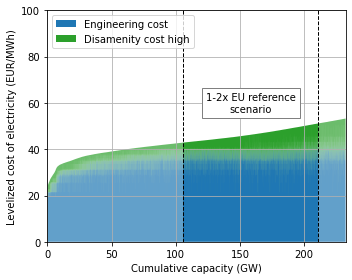

In [19]:
c = 'DE'

fig = plt.figure(figsize=[5,4])

tmp = turbines[turbines[c]>0].copy()
cumulative_capacity = cumulative_capacity = tmp[c].cumsum() / 1000

ax = fig.add_subplot(111)

tmp['total'] = tmp['engineering'] + 10 * tmp['disamenity']
engineering_cost = tmp.sort_values(['total', 'engineering'])['engineering']
n = int(2.2*targets[c]/2*1000)
plt.fill_between(cumulative_capacity[:n], 0, engineering_cost[:n], label='Engineering cost')

disamenity_cost = tmp.sort_values('total')['total']
plt.fill_between(cumulative_capacity[:n], engineering_cost[:n], disamenity_cost[:n], label='Disamenity cost high', facecolor='tab:green')

highlight(60)

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Levelized cost of electricity (EUR/MWh)')
plt.xlim(0, 2.2 * targets[c])
plt.ylim(0, 100)
plt.grid()
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('Figure 6.png', dpi=300)

a = tmp.sort_values('engineering')['engineering'].iloc[:int(targets[c]/2*1000)].mean()
b_1 = tmp.sort_values('total')['engineering'].iloc[:int(targets[c]/2*1000)].mean()
print(f'1x EU Ref.: Engineering cost increase from {a} to {b_1} by {b_1/a}')

a = tmp.sort_values('engineering')['engineering'].iloc[:int(2*targets[c]/2*1000)].mean()
b_2 = tmp.sort_values('total')['engineering'].iloc[:int(2*targets[c]/2*1000)].mean()
print(f'2x EU Ref.: Engineering cost increase from {a} to {b_2} by {b_2/a}')

Exposure between 3.4 and 7.4
Exposure between 2.4 and 5.0
Reduction to 0.7 and 0.67
Exposure between 1.3 and 3.1
Reduction to 0.37 and 0.42


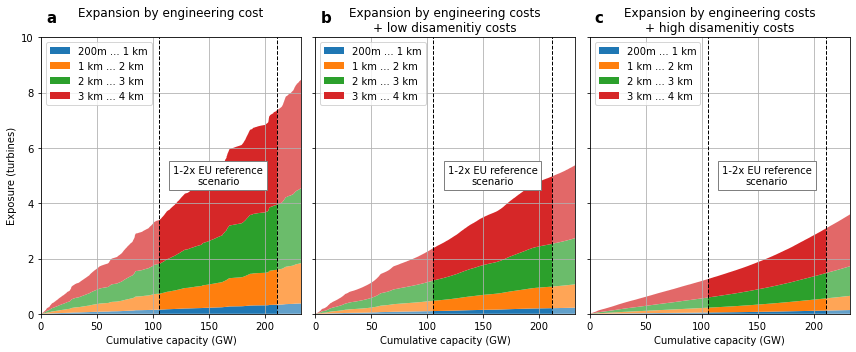

In [71]:
c='DE'
label_map = {
    1: '200m ... 1 km',
    2: '1 km ... 2 km',
    3: '2 km ... 3 km',
    4: '3 km ... 4 km',
}
tmp = turbines[turbines['DE']>0].copy()
cumulative_capacity = tmp['DE'].cumsum() / 1000

fig = plt.figure(figsize=[12,5])

ax1 = fig.add_subplot(131)
ax1.text(0.02, 1.1, 'a', transform=ax1.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

tmp_eng = tmp.fillna(0).sort_values('engineering').reset_index(drop=True)[list(range(1, 5))].cumsum() / population[c]

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

highlight()

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Exposure (turbines)')
plt.xlim(0, 2.2*targets[c])
plt.ylim(0, 10)

plt.legend(loc='upper left')
plt.title('Expansion by engineering cost\n')
plt.grid()

a0 = bottom[int(targets[c]/2*1000)]
b0 = bottom[int(2*targets[c]/2*1000)]
print(f'Exposure between {round(a0, 1)} and {round(b0, 1)}')


ax2 = fig.add_subplot(132)
ax2.text(0.02, 1.1, 'b', transform=ax2.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax2.set_yticklabels('')

tmp['total1'] = tmp['engineering'] + tmp['disamenity']
tmp_eng = tmp.fillna(0).sort_values('total1').reset_index(drop=True)[list(range(1, 5))].cumsum() / 81_000_000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

highlight()

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 2.2*targets[c])
plt.ylim(0, 10)

plt.legend(loc='upper left')
plt.title('Expansion by engineering costs\n+ low disamenitiy costs')
plt.grid()

a1 = bottom[int(targets[c]/2*1000)]
b1 = bottom[int(2*targets[c]/2*1000)]
print(f'Exposure between {round(a1, 1)} and {round(b1, 1)}')
print(f'Reduction to {round(a1/a0, 2)} and {round(b1/b0, 2)}')


ax3 = fig.add_subplot(133)
ax3.text(0.02, 1.1, 'c', transform=ax3.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax3.set_yticklabels('')

tmp['total2'] = tmp['engineering'] + 10 * tmp['disamenity']
tmp_eng = tmp.fillna(0).sort_values('total2').reset_index(drop=True)[list(range(1, 5))].cumsum() / 81_000_000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

highlight()

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 2.2*targets[c])
plt.ylim(0, 10)

plt.legend(loc='upper left')
plt.title('Expansion by engineering costs\n+ high disamenitiy costs')
plt.grid()

es_1 = bottom[int(targets[c]/2*1000)]
es_2 = bottom[int(2*targets[c]/2*1000)]
print(f'Exposure between {round(es_1, 1)} and {round(es_2, 1)}')
print(f'Reduction to {round(es_1/a0, 2)} and {round(es_2/b0, 2)}')


plt.tight_layout()
plt.savefig('Figure 7.png', dpi=300)

In [21]:
tmp_eng = tmp.sort_values('engineering').iloc[:n].copy()
interactions = tmp_eng.sum()[range(1,5)].sum()
interactions / 1_000_000

704.0022098699999

In [22]:
interactions / 80_000_000

8.800027623374998

In [23]:
interactions / len(tmp_eng)

6065.272202961979

In [24]:
interactions / len(tmp_eng) /3

2021.7574009873263

In [25]:
tmp_eng.mean()[range(1,5)].sum()

6065.27220296198

In [26]:
tmp_eng

,engineering,disamenity,1,2,3,4,AT,BE,BG,CZ,...,LV,NL,PL,PT,RO,SE,SI,SK,total1,total2
7550,19.494805,0.426104,88.35,386.15,648.70,1481.07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.920909,23.755844
5719,19.494805,2.040637,205.38,2751.54,3843.64,842.02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.535442,39.901174
5718,19.494805,2.081992,310.63,2463.45,3940.17,1921.80,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.576798,40.314729
5705,19.494805,0.406532,40.01,180.01,685.13,3189.34,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.901337,23.560121
5704,19.494805,0.807537,254.60,925.16,571.28,2501.99,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.302342,27.570174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133300,39.148995,2.517209,514.09,1325.37,1213.22,1877.44,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.666204,64.321089
133301,39.148995,2.733378,547.47,1550.97,1307.92,1396.50,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.882373,66.482771
133302,39.148995,1.748824,323.49,949.93,938.38,1219.69,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.897819,56.637239
117795,39.148995,1.149889,253.45,238.29,933.50,1961.65,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.298884,50.647886


# Smart vs. dumb distancing

In [27]:
turbines_DE_1000m = pd.read_csv(f"../build/turbines-DE-1000m.csv", index_col=0)[
    ['lcoe_eur_per_mwh', 'disamenity_cost_eur_per_mwh', '1', '2', '3', '4']
]
turbines_DE_1000m.columns = ['engineering', 'disamenity', 1, 2, 3, 4]
#turbines_DE_1000m['disamenity'] = tmp['disamenity'] / 8
turbines_DE_1000m['DE'] = 2
turbines_DE_1000m

,engineering,disamenity,1,2,3,4,DE
0,25.180517,0.667652,32.05,454.05,1347.93,955.81,2
1,25.180517,0.450472,136.29,233.85,513.01,989.42,2
2,25.180517,0.667652,32.05,454.05,1347.93,955.81,2
3,25.180517,0.475215,151.68,194.12,574.11,1204.77,2
4,25.180517,0.679742,137.83,536.95,892.64,658.18,2
...,...,...,...,...,...,...,...
191256,64.614618,6.390578,411.70,1750.28,3833.45,3315.28,2
191257,64.614618,6.390578,411.70,1750.28,3833.45,3315.28,2
191258,64.614618,6.390578,411.70,1750.28,3833.45,3315.28,2
191259,64.614618,6.643230,162.24,2375.70,4425.92,1479.11,2


382.522


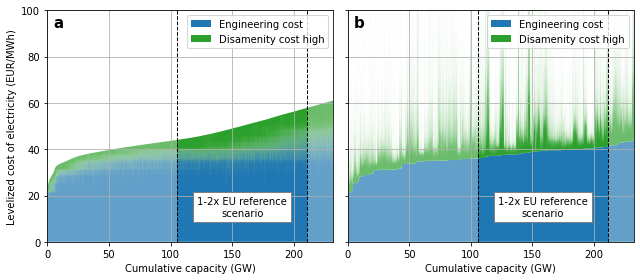

In [44]:
c = 'DE'

fig = plt.figure(figsize=[9,4])

tmp = turbines[turbines[c]>0].copy()
tmp['total'] = tmp['engineering'] + 10 * tmp['disamenity']
cumulative_capacity = tmp[c].cumsum() / 1000
engineering_cost = tmp.sort_values(['total', 'engineering'])['engineering']

tmp_smart_1000 = turbines_DE_1000m.copy()
tmp_smart_1000['total'] = tmp_smart_1000['engineering'] + 10 * tmp_smart_1000['disamenity']
cumulative_capacity_smart_1000 = tmp_smart_1000[c].cumsum() / 1000
engineering_cost_smart_1000 = tmp_smart_1000.sort_values(['total', 'engineering'])['engineering']
disamenity_cost_smart_1000 = tmp_smart_1000.sort_values('total')['total']

tmp_dumb = turbines_DE_1000m.copy()
tmp_dumb['total'] = tmp_dumb['engineering'] + 10 * tmp_dumb['disamenity']
cumulative_capacity_dumb = tmp_dumb[c].cumsum() / 1000
engineering_cost_dumb = tmp_dumb['engineering'].sort_values()
disamenity_cost_dumb = tmp_dumb.sort_values('engineering')['total']

print(cumulative_capacity_dumb.iloc[-1])

ax1 = fig.add_subplot(121)
ax1.text(0.02, 0.98, 'a', transform=ax1.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

plt.fill_between(cumulative_capacity_smart_1000, 0, engineering_cost_smart_1000, label='Engineering cost')

disamenity_cost = tmp.sort_values('total')['total']
plt.fill_between(cumulative_capacity_smart_1000, engineering_cost_smart_1000, disamenity_cost_smart_1000, label='Disamenity cost high', facecolor='tab:green')

highlight(15)

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Levelized cost of electricity (EUR/MWh)')
plt.xlim(0, 2.2*targets[c])
plt.xticks(range(0, 210, 50))
plt.ylim(0, 100)
plt.grid()
plt.legend()


ax2 = fig.add_subplot(122)
ax2.text(0.02, 0.98, 'b', transform=ax2.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax2.set_yticklabels('')


#print(disamenity_cost.iloc[:n].mean())
plt.fill_between(cumulative_capacity_dumb, 0, engineering_cost_dumb, label='Engineering cost')
plt.fill_between(cumulative_capacity_dumb, engineering_cost_dumb, disamenity_cost_dumb, facecolor='tab:green', label='Disamenity cost high')

highlight(15)

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 2.2*targets[c])
plt.ylim(0, 100)
plt.grid()
plt.legend()

plt.tight_layout()
plt.savefig('Figure 9.png', dpi=300)

Exposure between 2.8 and 5.3
Exposure between 2.2 and 4.7
Reduction to 0.78 and 0.89
Exposure between 1.2 and 3.5
Reduction to 0.45 and 0.66


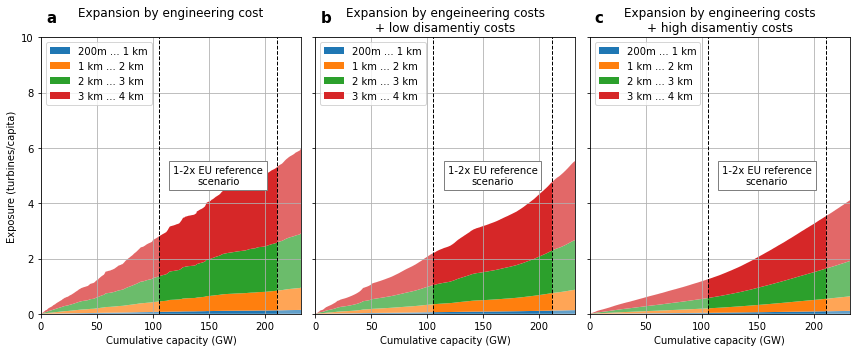

In [29]:
label_map = {
    1: '200m ... 1 km',
    2: '1 km ... 2 km',
    3: '2 km ... 3 km',
    4: '3 km ... 4 km',
}
tmp = turbines_DE_1000m.copy()
cumulative_capacity = tmp['DE'].cumsum() / 1000

fig = plt.figure(figsize=[12,5])

ax1 = fig.add_subplot(131)
ax1.text(0.02, 1.1, 'a', transform=ax1.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

tmp_eng = tmp.fillna(0).sort_values('engineering').reset_index(drop=True)[list(range(1, 5))].cumsum() / 81_000_000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

highlight()

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Exposure (turbines/capita)')
plt.xlim(0, 2.2*targets[c])
plt.ylim(0, 10)

plt.legend(loc='upper left')
plt.title('Expansion by engineering cost\n')
plt.grid()

a0 = bottom[int(targets[c]/2*1000)]
b0 = bottom[int(2*targets[c]/2*1000)]
ed_1, ed_2 = a0, b0
print(f'Exposure between {round(a0, 1)} and {round(b0, 1)}')


ax2 = fig.add_subplot(132)
ax2.text(0.02, 1.1, 'b', transform=ax2.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax2.set_yticklabels('')

tmp['total1'] = tmp['engineering'] + tmp['disamenity']
tmp_eng = tmp.fillna(0).sort_values('total1').reset_index(drop=True)[list(range(1, 5))].cumsum() / 81_000_000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

highlight()

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 2.2*targets[c])
plt.ylim(0, 10)

plt.legend(loc='upper left')
plt.title('Expansion by engeineering costs\n+ low disamentiy costs')
plt.grid()

a1 = bottom[int(targets[c]/2*1000)]
b1 = bottom[int(2*targets[c]/2*1000)]
print(f'Exposure between {round(a1, 1)} and {round(b1, 1)}')
print(f'Reduction to {round(a1/a0, 2)} and {round(b1/b0, 2)}')


ax3 = fig.add_subplot(133)
ax3.text(0.02, 1.1, 'c', transform=ax3.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax3.set_yticklabels('')

tmp['total2'] = tmp['engineering'] + 10 * tmp['disamenity']
tmp_eng = tmp.fillna(0).sort_values('total2').reset_index(drop=True)[list(range(1, 5))].cumsum() / 81_000_000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

highlight()

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 2.2*targets[c])
plt.ylim(0, 10)

plt.legend(loc='upper left')
plt.title('Expansion by engineering costs\n+ high disamentiy costs')
plt.grid()

a1 = bottom[int(targets[c]/2*1000)]
b1 = bottom[int(2*targets[c]/2*1000)]
es1000_1, es1000_2 = a1, b1
print(f'Exposure between {round(a1, 1)} and {round(b1, 1)}')
print(f'Reduction to {round(a1/a0, 2)} and {round(b1/b0, 2)}')


plt.tight_layout()
#plt.savefig('Figure 9.png', dpi=300)

In [43]:
kpi_dict = {
    'engineering': engineering_cost,
    'disamenity': disamenity_cost,
    'engineering dumb': engineering_cost_dumb,
    'disamenity dumb': disamenity_cost_dumb,
    'engineering smart 1000': engineering_cost_smart_1000,
    'disamenity smart 1000': disamenity_cost_smart_1000
}
kpi =  pd.DataFrame({
    'full': {
        key: value.mean().round() for key, value in kpi_dict.items()
    },
    '1x EU reference scenario (mean)': {
        key: value.iloc[:int(targets[c]/2*1000)].mean().round(1) for key, value in kpi_dict.items()
    },
    '2x EU reference scenario (mean)': {
        key: value.iloc[:int(targets[c]/2*1000*2)].mean().round(1) for key, value in kpi_dict.items()
    }
})
kpi.loc['engineering smart'] = [0, b_1, b_2]
kpi.loc['exposure smart'] = [0, es_1, es_2]
kpi.loc['exposure dumb'] = [0, ed_1, ed_2]
kpi.loc['exposure smart 1000'] = [0, es1000_1, es1000_2]
kpi.loc['disamenity dumb increase'] = kpi.loc['disamenity dumb'] / kpi.loc['disamenity']
kpi.loc['disamenity samart 1000 increase'] = kpi.loc['disamenity smart 1000'] / kpi.loc['disamenity']
kpi.loc['exposure dumb increase'] = kpi.loc['exposure dumb'] / kpi.loc['exposure smart']
kpi.loc['exposure smart 1000 increase'] = kpi.loc['exposure smart 1000'] / kpi.loc['exposure smart']
kpi #/ tmp.loc['engineering']

,full,1x EU reference scenario (mean),2x EU reference scenario (mean)
engineering,42.000000,33.200000,35.400000
disamenity,70.000000,38.300000,42.400000
engineering dumb,42.000000,32.500000,35.700000
disamenity dumb,60.000000,44.200000,47.700000
engineering smart 1000,42.000000,34.000000,36.800000
disamenity smart 1000,60.000000,39.000000,44.700000
engineering smart,0.000000,33.162813,35.381611
exposure smart,0.000000,1.254705,3.087816
exposure dumb,0.000000,2.802962,5.320676
exposure smart 1000,0.000000,1.248418,3.534126


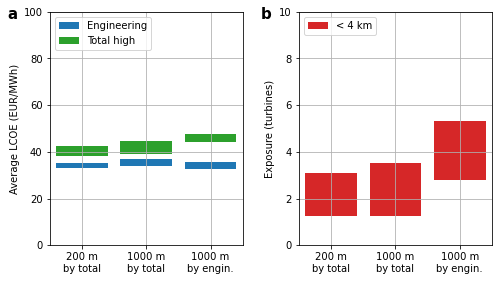

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(7, 4), sharex='col', gridspec_kw={'width_ratios': [1, 1]})

ax[0].text(-0.22, 1.02, 'a', transform=ax[0].transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

for i, df in enumerate([kpi.loc[['engineering smart', 'engineering smart 1000', 'engineering dumb']], 
                        kpi.loc[['disamenity', 'disamenity smart 1000', 'disamenity dumb']]]):
    ax[0].bar(
        range(len(df)),
        df['2x EU reference scenario (mean)']-df['1x EU reference scenario (mean)'],
        bottom=df['1x EU reference scenario (mean)'],
        color='tab:blue' if i==0 else 'tab:green',
        label='Engineering' if i==0 else 'Total high'
    )
    
ax[0].set_xlim([-0.5, 2.5])
ax[0].set_xticks([0, 1, 2])
ax[0].set_xticklabels(['200 m\nby total', '1000 m\nby total', '1000 m\nby engin.'])
ax[0].set_ylim(0, 100)
ax[0].set_ylabel('Average LCOE (EUR/MWh)')
ax[0].grid()
ax[0].legend(loc='upper left')


ax[1].text(-0.2, 1.02, 'b', transform=ax[1].transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

for i, df in enumerate([kpi.loc[['exposure smart', 'exposure smart 1000', 'exposure dumb']]]):
    ax[1].bar(
        range(i*len(df), i*len(df)+len(df)),
        df['2x EU reference scenario (mean)']-df['1x EU reference scenario (mean)'],
        bottom=df['1x EU reference scenario (mean)'],
        color='tab:red',
        label='< 4 km'
    )
    
ax[1].set_xlim([-0.5, 2.5])
ax[1].set_xticks([0, 1, 2])
ax[1].set_xticklabels(['200 m\nby total', '1000 m\nby total', '1000 m\nby engin.'])
ax[1].set_ylim(0, 10)
ax[1].set_ylabel('\nExposure (turbines)')
ax[1].grid()
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.savefig('Figure 8.png', dpi=300)

# Cross country

In [9]:
df_countries = pd.concat([
    targets[countries], turbines[countries].sum()/1000
], keys=['target', 'potential'], axis=1)

In [10]:
turbines

,engineering,disamenity,1,2,3,4,AT,BE,BG,CZ,...,LT,LU,LV,NL,PL,PT,RO,SE,SI,SK
0,34.669141,0.220159,0.84,108.80,320.64,331.89,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.669141,0.220159,0.84,108.80,320.64,331.89,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34.669141,0.720961,35.41,170.05,1130.68,1720.03,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34.669141,0.720961,35.41,170.05,1130.68,1720.03,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34.669141,0.495845,102.72,214.74,254.16,1228.16,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58929,26.465305,0.809103,131.34,595.66,941.52,1430.71,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
58930,26.465305,0.809103,131.34,595.66,941.52,1430.71,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
58931,26.465305,0.809103,131.34,595.66,941.52,1430.71,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
58932,26.465305,0.809103,131.34,595.66,941.52,1430.71,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [45]:
results = pd.DataFrame()

for c in countries:
    
    tmp = turbines[turbines[c]>0].copy()
    tmp['total cost low'] = tmp['engineering'] + tmp['disamenity']
    tmp['total cost high'] = tmp['engineering'] + 10 * tmp['disamenity']
    results_c = pd.Series({
        'Technical potential (GW)': (tmp[c].sum() / 1000).round()
    })
    
    # Expansion target
    n = min(int(targets[c] * 1000 / 2), len(tmp)-1)
    n2 = min(2*n, len(tmp)-1)
    results_c['Expansion target (GW)'] = targets[c]
    results_c['Targeted potential 1 (%)'] = 100 * targets[c] / results_c['Technical potential (GW)']
    results_c['Targeted potential 2 (%)'] = 2 * 100* targets[c] / results_c['Technical potential (GW)']
    
    # Average cost
    results_c['Average engineering cost 1 (€/MWh)'] = tmp['engineering'].sort_values().iloc[:n].mean().round()
    results_c['Average total cost low 1 (€/MWh)'] = tmp['total cost low'].sort_values().iloc[:n].mean().round()
    results_c['Increase in average cost low 1 (€/MWh)'] = results_c['Average total cost low 1 (€/MWh)'] - results_c['Average engineering cost 1 (€/MWh)']
    results_c['Increase in average cost low 1 (%)'] = 100 * (results_c['Average total cost low 1 (€/MWh)'] / results_c['Average engineering cost 1 (€/MWh)'] - 1).round(2)
    results_c['Average total cost high 1 (€/MWh)'] = tmp['total cost high'].sort_values().iloc[:n].mean().round()
    results_c['Increase in average cost high 1 (€/MWh)'] = results_c['Average total cost high 1 (€/MWh)'] - results_c['Average engineering cost 1 (€/MWh)']
    results_c['Increase in average cost high 1 (%)'] = 100 * (results_c['Average total cost high 1 (€/MWh)'] / results_c['Average engineering cost 1 (€/MWh)'] - 1).round(2)
    
    # Marginal cost 1x EU Ref
    results_c['Marginal engineering cost 1 (€/MWh)'] = tmp['engineering'].sort_values().iloc[n]
    results_c['Marginal total cost low 1 (€/MWh)'] = tmp['total cost low'].sort_values().iloc[n].round()
    results_c['Increase in marginal cost low 1 (€/MWh)'] = results_c['Marginal total cost low 1 (€/MWh)'] - results_c['Marginal engineering cost 1 (€/MWh)']
    results_c['Increase in marginal cost low 1 (%)'] = 100 * (results_c['Marginal total cost low 1 (€/MWh)'] / results_c['Marginal engineering cost 1 (€/MWh)'] - 1).round(2)
    results_c['Marginal total cost high 1 (€/MWh)'] = tmp['total cost high'].sort_values().iloc[n].round()
    results_c['Increase in marginal cost high 1 (€/MWh)'] = results_c['Marginal total cost high 1 (€/MWh)'] - results_c['Marginal engineering cost 1 (€/MWh)']
    results_c['Increase in marginal cost high 1 (%)'] = 100 * (results_c['Marginal total cost high 1 (€/MWh)'] / results_c['Marginal engineering cost 1 (€/MWh)'] - 1).round(2)
    
    # Marginal cost 2x EU Ref
    results_c['Marginal engineering cost 2 (€/MWh)'] = tmp['engineering'].sort_values().iloc[n2]
    results_c['Marginal total cost low 2 (€/MWh)'] = tmp['total cost low'].sort_values().iloc[n2].round()
    results_c['Increase in marginal cost low 2 (€/MWh)'] = results_c['Marginal total cost low 2 (€/MWh)'] - results_c['Marginal engineering cost 2 (€/MWh)']
    results_c['Increase in marginal cost low 2 (%)'] = 100 * (results_c['Marginal total cost low 2 (€/MWh)'] / results_c['Marginal engineering cost 2 (€/MWh)'] - 1).round(2)
    results_c['Marginal total cost high 2 (€/MWh)'] = tmp['total cost high'].sort_values().iloc[n2].round()
    results_c['Increase in marginal cost high 2 (€/MWh)'] = results_c['Marginal total cost high 2 (€/MWh)'] - results_c['Marginal engineering cost 2 (€/MWh)']
    results_c['Increase in marginal cost high 2 (%)'] = 100 * (results_c['Marginal total cost high 2 (€/MWh)'] / results_c['Marginal engineering cost 2 (€/MWh)'] - 1).round(2)
    
    # Exposure
    results_c['Exposure - expansion by engineering cost 1 (turbines)'] = (
        tmp.fillna(0).sort_values('engineering').iloc[:n][list(range(1, 5))].sum().sum() / population[c]
    )
    results_c['Exposure - expansion by total cost high 1 (turbines)'] = (
        tmp.fillna(0).sort_values('total cost high').iloc[:n][list(range(1, 5))].sum().sum() / population[c]
    )
    results_c['Exposure - expansion by engineering cost 2 (turbines)'] = (
        tmp.fillna(0).sort_values('engineering').iloc[:n2][list(range(1, 5))].sum().sum() / population[c]
    )
    results_c['Exposure - expansion by total cost high 2 (turbines)'] = (
        tmp.fillna(0).sort_values('total cost high').iloc[:n2][list(range(1, 5))].sum().sum() / population[c]
    )
    for i in range(1,5):
        results_c[f'{i}'] = (tmp.fillna(0).sort_values('total cost high').iloc[n][i].sum()).round()
    
    if c=='DK':
        results['DK*'] = results_c
    else:
        results[c] = results_c

results = results.sort_values('Targeted potential 1 (%)', axis=1, ascending=False)
results

,DK*,LU,NL,DE,BE,AT,ES,FR,PT,IE,...,CZ,RO,SI,EE,HU,BG,LT,SE,FI,LV
Technical potential (GW),10.000000,2.000000,123.000000,594.000000,46.000000,163.000000,1647.000000,1895.000000,368.000000,257.000000,...,264.000000,836.000000,26.000000,105.000000,285.000000,288.000000,262.000000,1704.000000,1401.000000,299.000000
Expansion target (GW),9.937161,0.630298,25.198052,105.519338,7.313586,9.635319,64.122135,66.062757,11.990232,8.054294,...,3.846454,10.572279,0.312270,1.166831,3.131698,2.768476,2.271274,14.511699,9.319734,0.950137
Targeted potential 1 (%),99.371611,31.514923,20.486221,17.764198,15.899099,5.911239,3.893269,3.486161,3.258215,3.133967,...,1.456990,1.264627,1.201038,1.111268,1.098841,0.961276,0.866898,0.851626,0.665220,0.317771
Targeted potential 2 (%),198.743222,63.029847,40.972442,35.528397,31.798199,11.822477,7.786537,6.972323,6.516430,6.267933,...,2.913980,2.529253,2.402075,2.222535,2.197683,1.922552,1.733797,1.703251,1.330440,0.635543
Average engineering cost 1 (€/MWh),23.000000,31.000000,26.000000,31.000000,29.000000,27.000000,24.000000,23.000000,22.000000,17.000000,...,30.000000,26.000000,35.000000,20.000000,27.000000,27.000000,27.000000,21.000000,23.000000,19.000000
Average total cost low 1 (€/MWh),24.000000,32.000000,28.000000,32.000000,31.000000,28.000000,24.000000,24.000000,23.000000,18.000000,...,31.000000,26.000000,36.000000,20.000000,27.000000,28.000000,27.000000,21.000000,23.000000,19.000000
Increase in average cost low 1 (€/MWh),1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Increase in average cost low 1 (%),4.000000,3.000000,8.000000,3.000000,7.000000,4.000000,0.000000,4.000000,5.000000,6.000000,...,3.000000,0.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
Average total cost high 1 (€/MWh),33.000000,41.000000,37.000000,38.000000,40.000000,32.000000,25.000000,29.000000,23.000000,19.000000,...,35.000000,27.000000,42.000000,20.000000,29.000000,28.000000,28.000000,23.000000,24.000000,19.000000
Increase in average cost high 1 (€/MWh),10.000000,10.000000,11.000000,7.000000,11.000000,5.000000,1.000000,6.000000,1.000000,2.000000,...,5.000000,1.000000,7.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000


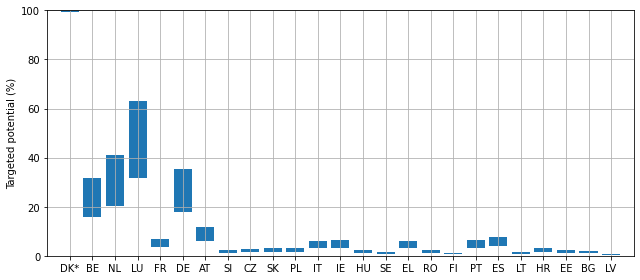

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4)) #, sharex='col', gridspec_kw={'width_ratios': [2, 1]})

ax.bar(
    results.columns,
    results.loc['Targeted potential 2 (%)'] - results.loc['Targeted potential 1 (%)'],
    bottom=results.loc['Targeted potential 1 (%)'],
    color='tab:blue'
)
    
ax.set_xlim([-1, len(results.columns)])
ax.set_ylim(0, 100)
ax.set_ylabel('Targeted potential (%)')
ax.grid()
plt.tight_layout()
plt.savefig('Figure 10.png', dpi=300)

<AxesSubplot:>

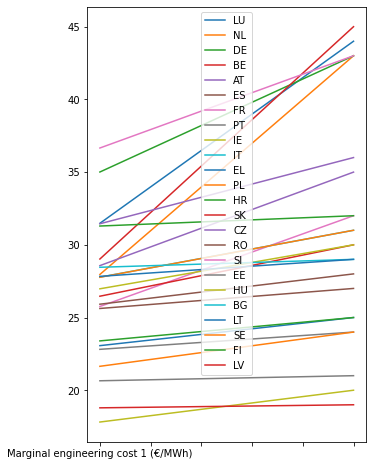

In [94]:
results.loc[
    ['Marginal engineering cost 1 (€/MWh)', 'Marginal total cost high 1 (€/MWh)']
].iloc[:,1:].plot(figsize=(5,8))

In [ ]:
plt.scatter(
    results.loc['Targeted potential 2 (%)'].iloc[1:], 
    results.loc['Marginal engineering cost 2 (€/MWh)'].iloc[1:]
)

In [102]:
results = results.sort_values('Marginal total cost high 1 (€/MWh)', axis=1, ascending=False)

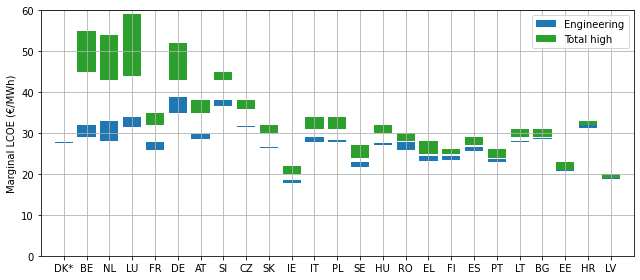

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4)) #, sharex='col', gridspec_kw={'width_ratios': [2, 1]})

ax.bar(
    results.columns,
    results.loc['Marginal engineering cost 2 (€/MWh)'] - results.loc['Marginal engineering cost 1 (€/MWh)'] + 0.25,
    bottom=results.loc['Marginal engineering cost 1 (€/MWh)'],
    color='tab:blue', label='Engineering'
)

ax.bar(
    results.columns,
    results.loc['Marginal total cost high 2 (€/MWh)'] - results.loc['Marginal total cost high 1 (€/MWh)'] + 1,
    bottom=results.loc['Marginal total cost high 1 (€/MWh)'],
    color='tab:green', label='Total high'
)
    
ax.set_xlim([-1, len(results.columns)])
ax.set_ylim(0, 60)
ax.set_ylabel('Marginal LCOE (€/MWh)')
ax.grid()
ax.legend()
plt.tight_layout()
plt.savefig('Figure 11.png', dpi=300)

In [65]:
results = results.sort_values('Increase in marginal cost high 1 (%)', axis=1, ascending=False)

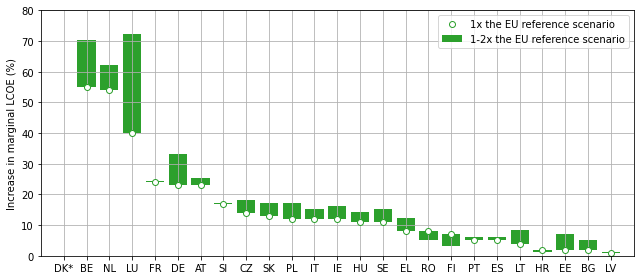

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4)) #, sharex='col', gridspec_kw={'width_ratios': [2, 1]})

ax.bar(
    results.columns,
    results.loc['Increase in marginal cost high 2 (%)'] - results.loc['Increase in marginal cost high 1 (%)'] + 0.25,
    bottom=results.loc['Increase in marginal cost high 1 (%)'],
    color='tab:green', label='1-2x the EU reference scenario'
)

ax.plot(
    results.columns,
    results.loc['Increase in marginal cost high 1 (%)'],
    color='white', label='1x the EU reference scenario', 
    linestyle='', marker='o', markeredgecolor='tab:green'
)


ax.set_xlim([-1, len(results.columns)])
ax.set_ylim(0, 80)
ax.set_ylabel('Increase in marginal LCOE (%)')
ax.grid()
ax.legend()
plt.tight_layout()
plt.savefig('Figure 11b.png', dpi=300)

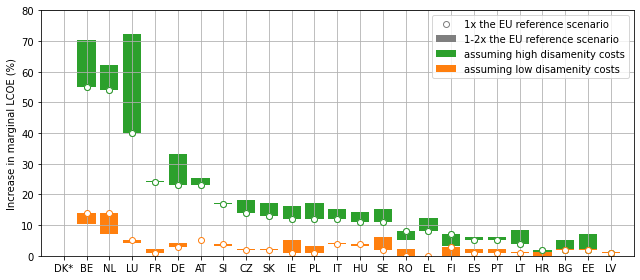

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4)) #, sharex='col', gridspec_kw={'width_ratios': [2, 1]})

# Just for the legend

ax.plot(
    results.columns,
    results.loc['Increase in marginal cost high 1 (%)'],
    color='white', label='1x the EU reference scenario', 
    linestyle='', marker='o', markeredgecolor='tab:grey'
)

ax.bar(
    results.columns[0],
    results.loc['Increase in marginal cost low 2 (%)'].iloc[0] - results.loc['Increase in marginal cost low 1 (%)'].iloc[0] + 0.25,
    bottom=results.loc['Increase in marginal cost low 1 (%)'].iloc[0],
    color='tab:grey', label='1-2x the EU reference scenario'
)

ax.bar(
    results.columns,
    results.loc['Increase in marginal cost high 2 (%)'] - results.loc['Increase in marginal cost high 1 (%)'] + 0.25,
    bottom=results.loc['Increase in marginal cost high 1 (%)'],
    color='tab:green', label='assuming high disamenity costs'
)

ax.bar(
    results.columns,
    results.loc['Increase in marginal cost low 2 (%)'] - results.loc['Increase in marginal cost low 1 (%)'] + 0.25,
    bottom=results.loc['Increase in marginal cost low 1 (%)'],
    color='tab:orange', label='assuming low disamenity costs'
)

ax.plot(
    results.columns,
    results.loc['Increase in marginal cost high 1 (%)'],
    color='white', #label='1x the EU reference scenario', 
    linestyle='', marker='o', markeredgecolor='tab:green'
)

ax.plot(
    results.columns,
    results.loc['Increase in marginal cost low 1 (%)'],
    color='white', #label='1x the EU reference scenario', 
    linestyle='', marker='o', markeredgecolor='tab:orange'
)


ax.set_xlim([-1, len(results.columns)])
ax.set_ylim(0, 80)
ax.set_ylabel('Increase in marginal LCOE (%)')
ax.grid()
ax.legend()
plt.tight_layout()
plt.savefig('Figure 11c.png', dpi=300)

In [62]:
results.loc[[
    'Increase in marginal cost high 1 (%)', 'Increase in marginal cost high 2 (%)', 
    'Increase in marginal cost low 1 (%)', 'Increase in marginal cost low 2 (%)'
]].unstack().quantile(0.9)

33.70000000000006

In [63]:
results = results.sort_values('Increase in marginal cost high 1 (€/MWh)', axis=1, ascending=False)

24.27206448577502


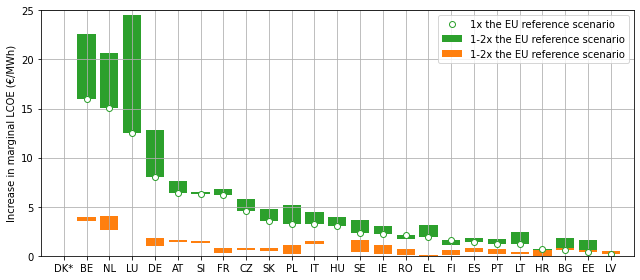

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4)) #, sharex='col', gridspec_kw={'width_ratios': [2, 1]})

ax.bar(
    results.columns,
    results.loc['Increase in marginal cost high 2 (€/MWh)'] - results.loc['Increase in marginal cost high 1 (€/MWh)'] + 0.25,
    bottom=results.loc['Increase in marginal cost high 1 (€/MWh)'],
    color='tab:green', label='1-2x the EU reference scenario'
)

ax.bar(
    results.columns,
    results.loc['Increase in marginal cost low 2 (€/MWh)'] - results.loc['Increase in marginal cost low 1 (€/MWh)'] + 0.25,
    bottom=results.loc['Increase in marginal cost low 1 (€/MWh)'],
    color='tab:orange', label='1-2x the EU reference scenario'
)

ax.plot(
    results.columns,
    results.loc['Increase in marginal cost high 1 (€/MWh)'],
    color='white', label='1x the EU reference scenario', 
    linestyle='', marker='o', markeredgecolor='tab:green'
)


ax.set_xlim([-1, len(results.columns)])
ax.set_ylim(0, 25)
ax.set_ylabel('Increase in marginal LCOE (€/MWh)')
ax.grid()
ax.legend()
plt.tight_layout()
plt.savefig('Figure 11d.png', dpi=300)

print(results.loc['Increase in marginal cost high 2 (€/MWh)'].iloc[1:].max())

In [51]:
print(results.loc['Increase in marginal cost high 2 (€/MWh)'].iloc[1:].min())

0.21009664154653862


In [61]:
results.loc[[
    'Increase in marginal cost high 1 (€/MWh)', 'Increase in marginal cost high 2 (€/MWh)', 
    'Increase in marginal cost low 1 (€/MWh)', 'Increase in marginal cost low 2 (€/MWh)'
]].unstack().quantile(0.9)

12.523209682197358

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4)) #, sharex='col', gridspec_kw={'width_ratios': [2, 1]})

ax.bar(
    results.columns,
    results.loc['Increase in marginal cost high 2 (%)'] - results.loc['Increase in marginal cost high 1 (%)'] + 0.25,
    bottom=results.loc['Increase in marginal cost high 1 (%)'],
    color='tab:green', label='1-2x the EU reference scenario'
)

ax.plot(
    results.columns,
    results.loc['Increase in marginal cost high 1 (%)'],
    color='white', label='1x the EU reference scenario', 
    linestyle='', marker='o', markeredgecolor='tab:green'
)


ax.set_xlim([-1, len(results.columns)])
ax.set_ylim(0, 80)
ax.set_ylabel('Increase in marginal LCOE (%)')
ax.grid()
ax.legend()
plt.tight_layout()
plt.savefig('Figure 11b.png', dpi=300)

In [66]:
results.loc['Increase in marginal cost high 2 (%)'].iloc[2:].mean()

17.26086956521739

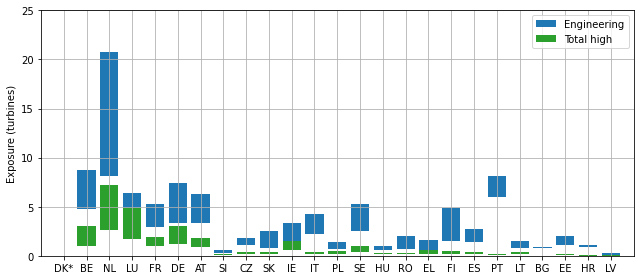

In [143]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4)) #, sharex='col', gridspec_kw={'width_ratios': [2, 1]})

ax.bar(
    results.columns,
    results.loc['Exposure - expansion by engineering cost 2 (turbines)'] - results.loc['Exposure - expansion by engineering cost 1 (turbines)'],
    bottom=results.loc['Exposure - expansion by engineering cost 1 (turbines)'],
    color='tab:blue', label='Engineering'
)

ax.bar(
    results.columns,
    results.loc['Exposure - expansion by total cost high 2 (turbines)'] - results.loc['Exposure - expansion by total cost high 1 (turbines)'],
    bottom=results.loc['Exposure - expansion by total cost high 1 (turbines)'],
    color='tab:green', label='Total high'
)

ax.set_xlim([-1, len(results.columns)])
ax.set_ylim(0, 25)
ax.set_ylabel('Exposure (turbines)')
ax.grid()
ax.legend()
plt.tight_layout()
plt.savefig('Figure 12.png', dpi=300)

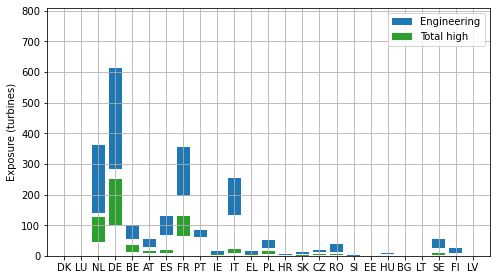

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4)) #, sharex='col', gridspec_kw={'width_ratios': [2, 1]})

ax.bar(
    results.columns,
    results.loc['Exposure - expansion by engineering cost 2 (turbines)'] - results.loc['Exposure - expansion by engineering cost 1 (turbines)'],
    bottom=results.loc['Exposure - expansion by engineering cost 1 (turbines)'],
    color='tab:blue', label='Engineering'
)

ax.bar(
    results.columns,
    results.loc['Exposure - expansion by total cost high 2 (turbines)'] - results.loc['Exposure - expansion by total cost high 1 (turbines)'],
    bottom=results.loc['Exposure - expansion by total cost high 1 (turbines)'],
    color='tab:green', label='Total high'
)

ax.set_xlim([-1, len(results.columns)])
ax.set_ylim(0, 810)
ax.set_ylabel('Exposure (turbines)')
ax.grid()
ax.legend()
plt.tight_layout()

In [ ]:
{
    'ES': 94,
    'FR': 106,
    'AT': 106
}

In [17]:
tmp['engineering']

0       25.195870
1       25.195870
2       25.195870
3       24.065717
4       25.195870
          ...    
4759    20.027819
4760    20.027819
4761    20.027819
4762    20.027819
4763    20.027819
Name: engineering, Length: 4764, dtype: float64

(0.0, 80.0)

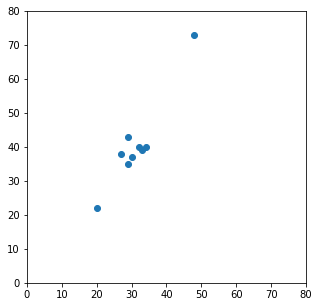

In [116]:
plt.figure(figsize=(5,5))
plt.scatter(results.loc['Average engineering cost (€/MWh)'], results.loc['Average total cost high (€/MWh)'])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.xlabel('Engineering cost (€/MWh)')
plt.xlabel('Engineering cost (€/MWh)')

In [152]:
pd.Series([3, np.nan]).mean()

3.0

In [149]:
import numpy as np

In [ ]:
pan

<Figure size 360x360 with 0 Axes>

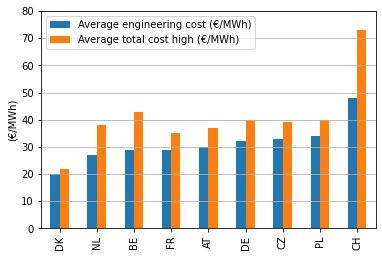

In [143]:
plt.figure(figsize=(5,5))
results.loc[['Average engineering cost (€/MWh)', 'Average total cost high (€/MWh)']].transpose().plot(kind='bar')
#plt.xlim(0, 80)
plt.ylim(0, 80)
plt.ylabel('(€/MWh)')
plt.grid(axis='y')

<Figure size 360x360 with 0 Axes>

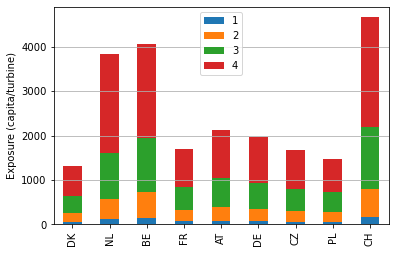

In [144]:
plt.figure(figsize=(5,5))
results.loc[[str(i) for i in range(1,5)]].transpose().plot(kind='bar', stacked=True)
#plt.xlim(0, 80)
#plt.ylim(0, 80)
plt.ylabel('Exposure (capita/turbine)')
plt.grid(axis='y')

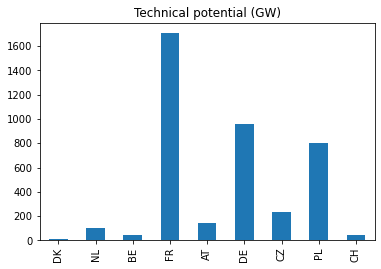

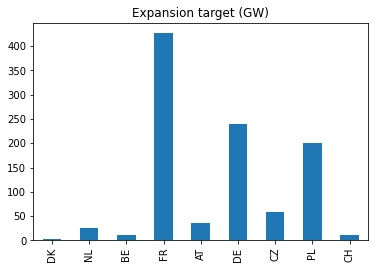

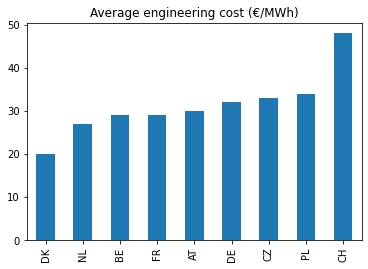

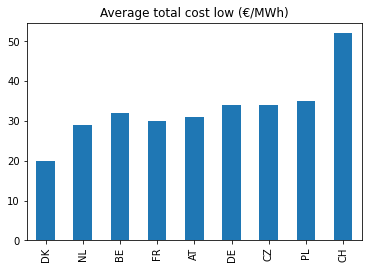

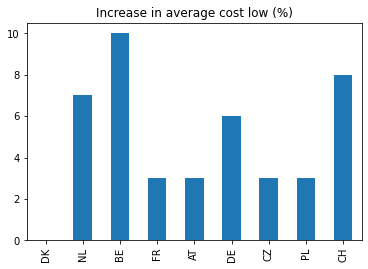

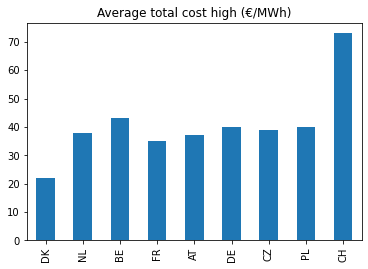

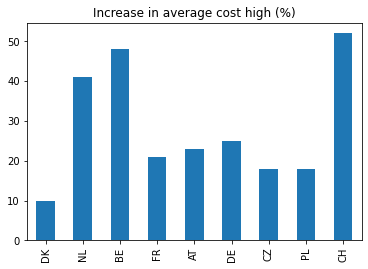

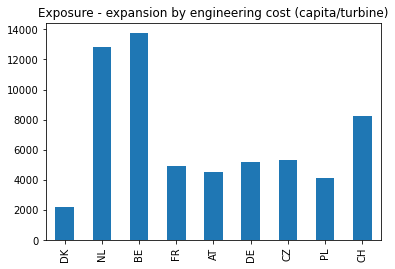

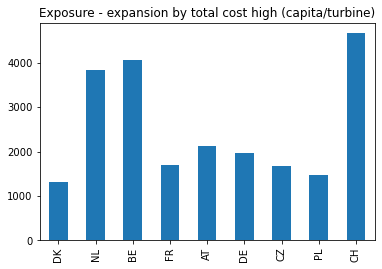

In [131]:
for param in results.index:
    plt.figure()
    results.loc[param].plot(kind='bar', title=param)
    plt.grid
    #plt.ylim(0,80)

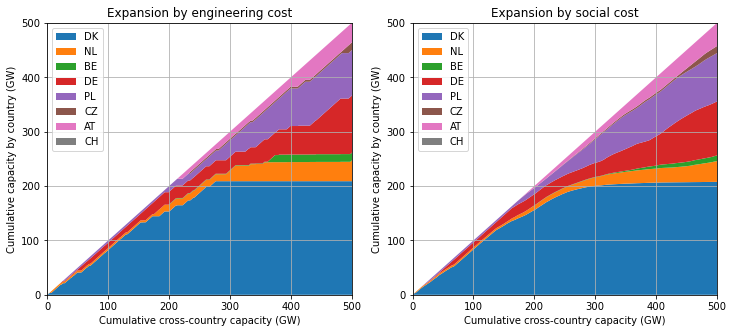

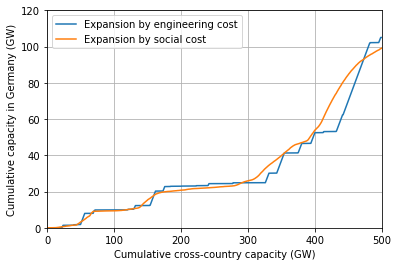

In [37]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(121)

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

tmp_eng = turbines.fillna(0).sort_values('engineering').reset_index(drop=True)[countries].cumsum() /1000

bottom = 0
for c in countries:
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[c], label=c)
    bottom += tmp_eng[c]

plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity by country (GW)')
plt.xlim(0, 500)
plt.ylim(0, 500)

plt.legend(loc='upper left')
plt.title('Expansion by engineering cost')
plt.grid()

ax = fig.add_subplot(122)
#plt.figure(figsize=[6,5])

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

tmp_soc = turbines.fillna(0).sort_values('total').reset_index(drop=True)[countries].cumsum() /1000

bottom = 0
for c in countries:
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_soc[c], label=c)
    bottom += tmp_soc[c]

plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity by country (GW)')
plt.xlim(0, 500)
plt.ylim(0, 500)

plt.legend(loc='upper left')
plt.title('Expansion by social cost')
plt.grid()

# DE only
expansion_DE = pd.concat([tmp_eng['DE'], tmp_soc['DE']], axis=1, keys=['Expansion by engineering cost', 'Expansion by social cost'])
expansion_DE.index = cumulative_capacity
expansion_DE.plot()
plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity in Germany (GW)')
plt.xlim(0, 500)
plt.ylim(0, 120)
plt.grid()

(0.0, 20.0)

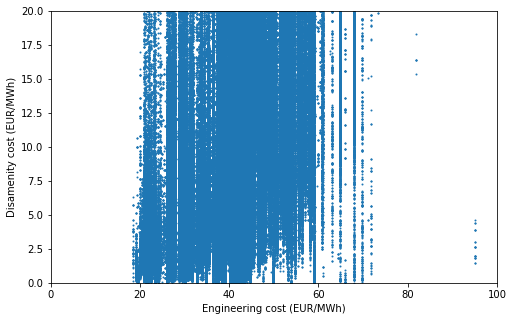

In [20]:
plt.figure(figsize=[8,5])

plt.scatter(turbines['engineering'], turbines['disamenity'], 1)

plt.xlabel('Engineering cost (EUR/MWh)')
plt.ylabel('Disamenity cost (EUR/MWh)')
plt.xlim(0, 100)
plt.ylim(0, 20)